In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from mlUtilities import ml_utils

In [4]:
import mlUtilities as utils
from mlUtilities import data_utils

In [5]:
from importlib import reload

In [6]:
reload(data_utils)

<module 'mlUtilities.data_utils' from '/home/gsandoval/Documents/Classes/depaul/ML_Programming/Project/MLProgramming/mlUtilities/data_utils.py'>

# Import data

In [7]:
data_5m = pd.read_csv('Data/5m_SPY')
data_5m['Datetime'] = pd.to_datetime(data_5m['Datetime'])

### Intraday Data: 5 minute interval

In [8]:
data_5m.shape

(4645, 7)

In [9]:
data_5m.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-11-17 09:30:00-05:00,469.000000,469.040009,468.450012,468.519989,468.519989,2523699
1,2021-11-17 09:35:00-05:00,468.529999,468.540009,468.160004,468.320007,468.320007,836314
2,2021-11-17 09:40:00-05:00,468.320007,468.524994,468.160004,468.450012,468.450012,577620
3,2021-11-17 09:45:00-05:00,468.450012,468.640015,468.130005,468.135010,468.135010,865588
4,2021-11-17 09:50:00-05:00,468.135010,468.135010,467.579987,467.670013,467.670013,951646


In [10]:
data_5m.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
4640,2022-02-11 15:35:00-05:00,441.029999,441.179993,440.029999,440.179993,440.179993,1601599
4641,2022-02-11 15:40:00-05:00,440.184998,440.399994,438.940002,440.010010,440.010010,3311310
4642,2022-02-11 15:45:00-05:00,440.016998,441.899994,439.880005,441.880005,441.880005,3145283
4643,2022-02-11 15:50:00-05:00,441.890015,442.209991,440.820007,441.119995,441.119995,4522462
4644,2022-02-11 15:55:00-05:00,441.130005,442.519989,440.420013,440.500000,440.500000,7761179


### Daily Data

In [11]:
data_d = pd.read_csv('Data/1d_SPY')
data_d['Date'] = pd.to_datetime(data_d['Date'])

In [12]:
data_d = data_d.loc[data_d.Date > '2021-11-16'].copy()
data_d.reset_index(drop=True, inplace=True)

In [13]:
data_d.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-11-17,469.190002,467.480011,469.000000,468.140015,47858300.0,466.501099
1,2021-11-18,470.010010,466.339996,469.239990,469.730011,50625600.0,468.085510
2,2021-11-19,470.940002,468.500000,469.609985,468.890015,57315600.0,467.248474
3,2021-11-22,473.540009,467.350006,470.890015,467.570007,72762000.0,465.933075
4,2021-11-23,469.100006,464.450012,467.220001,468.190002,73206500.0,466.550903


In [14]:
data_d.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
55,2022-02-07,450.989990,445.850006,449.510010,447.260010,84472900.0,447.260010
56,2022-02-08,451.920013,445.220001,446.730011,450.940002,81012000.0,450.940002
57,2022-02-09,457.880005,455.010010,455.220001,457.540009,92589900.0,457.540009
58,2022-02-10,457.709991,447.200012,451.339996,449.320007,140103700.0,449.320007
59,2022-02-11,451.609985,438.940002,449.410004,440.459991,153064100.0,440.459991


I should add change data before filtering by the date.

# Data Transformations

## Create Change Data

To start we will calcualte the change over n time period.

We will use: 
$change_n = \dfrac{Close_n - Open_i-n}{Open_i-n}$

Where $i$ is the current period.  So change_0 is the change of the current time period, change_5 is the change starting from 5 periods ago to the current close.

### Lets look at change_0

In [15]:
data_5m = utils.change_n(data_5m, 1)
data_5m['Change_0'] = (data_5m['Close'] - data_5m['Open']) / data_5m['Open']

In [16]:
data_5m.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,change_1,Change_0
0,2021-11-17 09:30:00-05:00,469.000000,469.040009,468.450012,468.519989,468.519989,2523699,NaN,-0.001023
1,2021-11-17 09:35:00-05:00,468.529999,468.540009,468.160004,468.320007,468.320007,836314,-0.000427,-0.000448
2,2021-11-17 09:40:00-05:00,468.320007,468.524994,468.160004,468.450012,468.450012,577620,0.000278,0.000278
3,2021-11-17 09:45:00-05:00,468.450012,468.640015,468.130005,468.135010,468.135010,865588,-0.000672,-0.000672
4,2021-11-17 09:50:00-05:00,468.135010,468.135010,467.579987,467.670013,467.670013,951646,-0.000993,-0.000993


## Analysis with Normalized Volume from the start

In [19]:
data_5m['Volume'] = data_utils.min_max_normalize(data_5m['Volume'], 0, 5)
data_d['Volume'] = data_utils.min_max_normalize(data_d['Volume'], 0, 5)

### Add volume tide

In [20]:
data_5m = data_utils.vol_tide(data_5m)

In [21]:
data_5m.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,change_1,Change_0,Vol_Direction,Dir_to_Vol,Vol_Tide
0,2021-11-17 09:30:00-05:00,469.000000,469.040009,468.450012,468.519989,468.519989,0.737352,NaN,-0.001023,NaN,NaN,NaN
1,2021-11-17 09:35:00-05:00,468.529999,468.540009,468.160004,468.320007,468.320007,0.244347,-0.000427,-0.000448,-1.0,-0.244347,-0.244347
2,2021-11-17 09:40:00-05:00,468.320007,468.524994,468.160004,468.450012,468.450012,0.168764,0.000278,0.000278,1.0,0.168764,-0.075583
3,2021-11-17 09:45:00-05:00,468.450012,468.640015,468.130005,468.135010,468.135010,0.252900,-0.000672,-0.000672,-1.0,-0.252900,-0.328483
4,2021-11-17 09:50:00-05:00,468.135010,468.135010,467.579987,467.670013,467.670013,0.278044,-0.000993,-0.000993,-1.0,-0.278044,-0.606527


<AxesSubplot:>

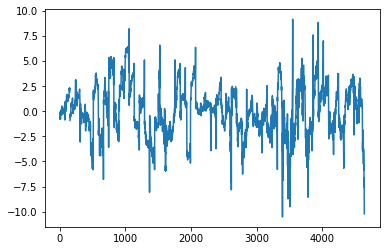

In [22]:
data_5m.Vol_Tide.plot()

Get the last value of the day for Vol_Tide.  

Merge the values into the daily data df.

In [23]:
eod_vol_tide = data_5m.groupby([data_5m.Datetime.dt.date])['Dir_to_Vol'].sum()

Add the End Of Day (EOD) Vol Tide to the daily dataframe.

In [24]:
data_d['EOD_Vol_Tide'] = eod_vol_tide.values

In [25]:
data_d.head()

,Date,High,Low,Open,Close,Volume,Adj Close,EOD_Vol_Tide
0,2021-11-17,469.190002,467.480011,469.000000,468.140015,0.014271,466.501099,-0.868448
1,2021-11-18,470.010010,466.339996,469.239990,469.730011,0.081928,468.085510,2.212248
2,2021-11-19,470.940002,468.500000,469.609985,468.890015,0.245490,467.248474,1.092567
3,2021-11-22,473.540009,467.350006,470.890015,467.570007,0.623135,465.933075,-3.064953
4,2021-11-23,469.100006,464.450012,467.220001,468.190002,0.634003,466.550903,-0.579285


## Non-Normalized Volume Study

Normalize the volume data after creating the volume based variables.

In [26]:
data2_5m = pd.read_csv('Data/5m_SPY')
data2_5m['Datetime'] = pd.to_datetime(data2_5m['Datetime'])

data2_d = pd.read_csv('Data/1d_SPY')
data2_d['Date'] = pd.to_datetime(data2_d['Date'])
data2_d = data2_d.loc[data2_d.Date > '2021-11-16'].copy()
data2_d.reset_index(drop=True, inplace=True)

In [27]:
data2_d.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-11-17,469.190002,467.480011,469.000000,468.140015,47858300.0,466.501099
1,2021-11-18,470.010010,466.339996,469.239990,469.730011,50625600.0,468.085510
2,2021-11-19,470.940002,468.500000,469.609985,468.890015,57315600.0,467.248474
3,2021-11-22,473.540009,467.350006,470.890015,467.570007,72762000.0,465.933075
4,2021-11-23,469.100006,464.450012,467.220001,468.190002,73206500.0,466.550903


In [28]:
data2_5m = data_utils.vol_tide(data2_5m)
data2_5m.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,Vol_Direction,Dir_to_Vol,Vol_Tide
0,2021-11-17 09:30:00-05:00,469.000000,469.040009,468.450012,468.519989,468.519989,2523699,NaN,NaN,NaN
1,2021-11-17 09:35:00-05:00,468.529999,468.540009,468.160004,468.320007,468.320007,836314,-1.0,-836314.0,-836314.0
2,2021-11-17 09:40:00-05:00,468.320007,468.524994,468.160004,468.450012,468.450012,577620,1.0,577620.0,-258694.0
3,2021-11-17 09:45:00-05:00,468.450012,468.640015,468.130005,468.135010,468.135010,865588,-1.0,-865588.0,-1124282.0
4,2021-11-17 09:50:00-05:00,468.135010,468.135010,467.579987,467.670013,467.670013,951646,-1.0,-951646.0,-2075928.0


In [29]:
eod_vol_tide = data2_5m.groupby([data2_5m.Datetime.dt.date])['Dir_to_Vol'].sum()

In [30]:
data2_d['EOD_Vol_Tide'] = eod_vol_tide.values

In [31]:
data2_d = data_utils.directional_volume(data2_d)

In [32]:
data2_d['Volume_Diff'] = data2_d.Directional_Volume - data2_d.EOD_Vol_Tide

In [33]:
data2_d['Vol_Adv_Dec'] = data2_d.Directional_Volume.cumsum()

In [34]:
data2_d.head()

,Date,High,Low,Open,Close,Volume,Adj Close,EOD_Vol_Tide,Directional_Volume,Volume_Diff,Vol_Adv_Dec
0,2021-11-17,469.190002,467.480011,469.000000,468.140015,47858300.0,466.501099,-2972394.0,-47858300.0,-44885906.0,-47858300.0
1,2021-11-18,470.010010,466.339996,469.239990,469.730011,50625600.0,468.085510,7571749.0,50625600.0,43053851.0,2767300.0
2,2021-11-19,470.940002,468.500000,469.609985,468.890015,57315600.0,467.248474,3739474.0,-57315600.0,-61055074.0,-54548300.0
3,2021-11-22,473.540009,467.350006,470.890015,467.570007,72762000.0,465.933075,-10490262.0,-72762000.0,-62271738.0,-127310300.0
4,2021-11-23,469.100006,464.450012,467.220001,468.190002,73206500.0,466.550903,-1982691.0,73206500.0,75189191.0,-54103800.0


<AxesSubplot:>

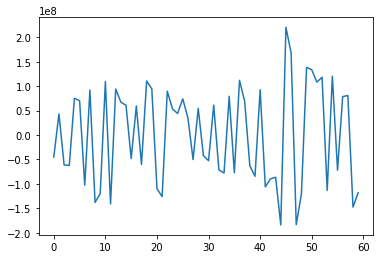

In [35]:
data2_d['Volume_Diff'].plot()

<AxesSubplot:>

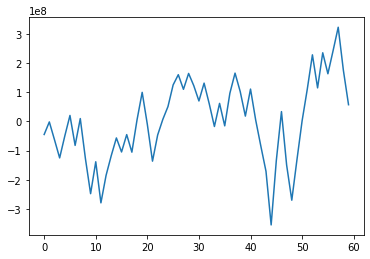

In [36]:
data2_d['Volume_Diff'].cumsum().plot()

<AxesSubplot:>

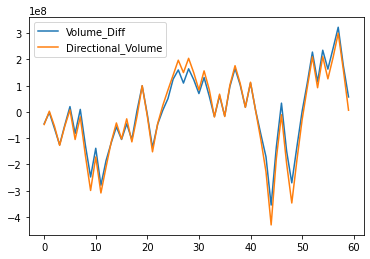

In [37]:
data2_d[['Volume_Diff', 'Directional_Volume']].cumsum().plot()

<AxesSubplot:>

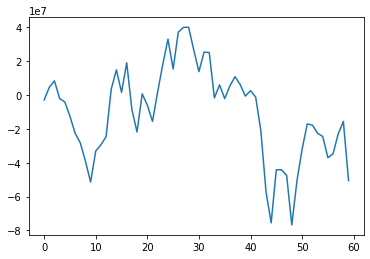

In [38]:
data2_d['EOD_Vol_Tide'].cumsum().plot()

<AxesSubplot:>

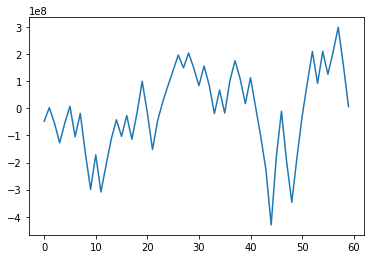

In [39]:
data2_d['Vol_Adv_Dec'].plot()

In [40]:
data2_d.head()

,Date,High,Low,Open,Close,Volume,Adj Close,EOD_Vol_Tide,Directional_Volume,Volume_Diff,Vol_Adv_Dec
0,2021-11-17,469.190002,467.480011,469.000000,468.140015,47858300.0,466.501099,-2972394.0,-47858300.0,-44885906.0,-47858300.0
1,2021-11-18,470.010010,466.339996,469.239990,469.730011,50625600.0,468.085510,7571749.0,50625600.0,43053851.0,2767300.0
2,2021-11-19,470.940002,468.500000,469.609985,468.890015,57315600.0,467.248474,3739474.0,-57315600.0,-61055074.0,-54548300.0
3,2021-11-22,473.540009,467.350006,470.890015,467.570007,72762000.0,465.933075,-10490262.0,-72762000.0,-62271738.0,-127310300.0
4,2021-11-23,469.100006,464.450012,467.220001,468.190002,73206500.0,466.550903,-1982691.0,73206500.0,75189191.0,-54103800.0


Make a copy of data2_d and then start to normalize the variables.

In [41]:
norm_data = data2_d.copy(deep=True)

In [42]:
norm_data.EOD_Vol_Tide.mean()

-843468.9666666667

In [43]:
norm_data.EOD_Vol_Tide.mean()

-843468.9666666667

Normalizing by the mean is ineffective because the mean of the volume 
columns is close to zero. 
This is because we have close to a normal distribution with a center of 0.

<AxesSubplot:>

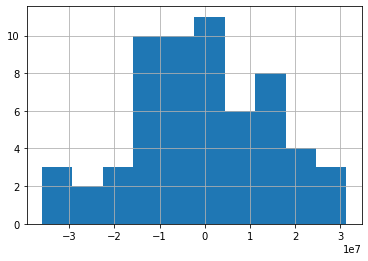

In [44]:
norm_data.EOD_Vol_Tide.hist()

In [45]:
cols_to_normalize = ['EOD_Vol_Tide', 'Directional_Volume', 'Vol_Adv_Dec', 'Volume_Diff']
for col in cols_to_normalize:
    norm_data[col] = data_utils.min_max_normalize(norm_data[col], -3, 3)

In [46]:
norm_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,EOD_Vol_Tide,Directional_Volume,Volume_Diff,Vol_Adv_Dec
0,2021-11-17,469.190002,467.480011,469.000000,468.140015,47858300.0,466.501099,-0.057482,-0.959549,-0.938249,0.143689
1,2021-11-18,470.010010,466.339996,469.239990,469.730011,50625600.0,468.085510,0.881781,0.341843,0.367080,0.559689
2,2021-11-19,470.940002,468.500000,469.609985,468.890015,57315600.0,467.248474,0.540405,-1.084520,-1.178256,0.088716
3,2021-11-22,473.540009,467.350006,470.890015,467.570007,72762000.0,465.933075,-0.727166,-1.288632,-1.196315,-0.509183
4,2021-11-23,469.100006,464.450012,467.220001,468.190002,73206500.0,466.550903,0.030680,0.640233,0.844080,0.092369


In [47]:
reload(data_utils)

<module 'mlUtilities.data_utils' from '/home/gsandoval/Documents/Classes/depaul/ML_Programming/Project/MLProgramming/mlUtilities/data_utils.py'>

In [48]:
norm_data['Norm_Vol_Diff'] = norm_data.Vol_Adv_Dec - norm_data.EOD_Vol_Tide

<AxesSubplot:>

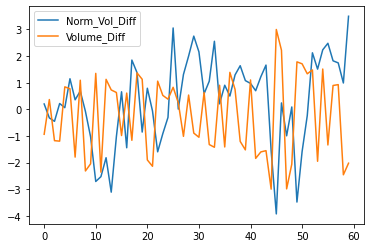

In [49]:
norm_data[['Norm_Vol_Diff', 'Volume_Diff']].plot()

- Next I need to create the pct change columns. 

- Select my target variable 

- Apply the class transform to my target variable

- Run naive bayes on the final dataframe